## Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, scorer
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold



/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Set Options

In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
# sns.set_style('darkgrid')
sns.set_style('whitegrid')

random.seed(129)

## Load Data

In [4]:
df = pickle.load(open('./clean_data/total.pkl', 'rb'))

## Inspect Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5235 entries, 0 to 5234
Data columns (total 46 columns):
Player                     5235 non-null object
Club                       5235 non-null object
POS                        5235 non-null object
GP                         5235 non-null float64
GS                         5235 non-null float64
MINS                       5235 non-null float64
G                          5235 non-null float64
A                          5235 non-null float64
SHTS_FP                    5235 non-null float64
SOG                        5235 non-null float64
GWG                        5235 non-null float64
HmG                        5235 non-null float64
RdG                        5235 non-null float64
Gp90                       5235 non-null float64
SCpct                      5235 non-null float64
Year                       5235 non-null int64
Season                     5235 non-null object
GWA                        5235 non-null float64
HmA              

In [6]:
pd.concat([df.head(5), df.tail(5)], axis=0)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,Season,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Last Name,First Name,Base Salary,Guaranteed Compensation,Date,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
0,Luciano Emilio,DC,F,29.0,28.0,2410.0,20.0,1.0,79.0,47.0,4.0,12.0,8.0,0.75,25.3,2007,REG,1.0,1.0,0.0,0.04,59.5,35.0,39.0,21.0,2.0,0.0,0.0,0.0,Emilio,Luciano,265000.00,293125.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Juan Pablo Angel,NY,F,24.0,24.0,2125.0,19.0,5.0,97.0,53.0,5.0,13.0,6.0,0.80,19.6,2007,REG,2.0,3.0,2.0,0.21,54.6,31.0,20.0,42.0,2.0,1.0,5.0,5.0,Pablo Angel,Juan,1500000.00,1593750.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Taylor Twellman,NE,F,26.0,25.0,2283.0,16.0,3.0,90.0,55.0,5.0,7.0,9.0,0.63,17.8,2007,REG,1.0,2.0,1.0,0.12,61.1,13.0,41.0,21.0,2.0,0.0,0.0,0.0,Twellman,Taylor,325008.00,350008.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Eddie Johnson,KC,F,24.0,24.0,2149.0,15.0,6.0,75.0,43.0,6.0,8.0,7.0,0.63,20.0,2007,REG,2.0,3.0,3.0,0.25,57.3,21.0,57.0,50.0,6.0,0.0,1.0,1.0,Johnson,Eddie,750000.00,875000.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maykel Galindo,CHV,F,28.0,24.0,2021.0,12.0,5.0,55.0,28.0,5.0,8.0,4.0,0.53,21.8,2007,REG,3.0,3.0,2.0,0.22,50.9,44.0,53.0,30.0,6.0,0.0,0.0,0.0,Galindo,Maykel,72500.00,72500.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5230,Kendall McIntosh,POR,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,McIntosh,Kendall,53000.00,53000.00,2017-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5231,Josh Saunders,ORL,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saunders,Josh,150000.00,150000.00,2017-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5232,Eric Kronberg,MTL,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kronberg,Eric,99999.96,104999.96,2017-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5233,Bryan Meredith,SEA,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Meredith,Bryan,66150.00,66150.00,2017-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5234,Ryan Meara,NY,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2017,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Meara,Ryan,100008.00,105008.00,2017-04-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.sample(10, random_state=129)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,Season,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Last Name,First Name,Base Salary,Guaranteed Compensation,Date,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
2042,Michael Nanchoff,VAN,M,9.0,1.0,145.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,2012,REG,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,Nanchoff,Michael,66000.0,101000.00,2012-05-15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4664,Brad Guzan,CHV,GK,27.0,27.0,2430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2007,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guzan,Brad,52237.5,67237.50,2007-08-31,119.0,87.0,25.0,0.93,14.0,6.0,7.0,13.0,51.9,73.1,2.0,3.0
4904,Kyle Reynish,RSL,GK,3.0,3.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2012,REG,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Reynish,Kyle,66000.0,74304.00,2012-05-15,8.0,6.0,2.0,0.67,1.0,0.0,2.0,2.0,33.3,75.0,0.0,0.0
159,Josh Tudela,LA,M,9.0,9.0,779.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.00,0.0,2007,REG,1.0,1.0,0.0,0.12,66.7,15.0,6.0,0.0,2.0,0.0,0.0,0.0,Tudela,Josh,17700.0,17700.00,2007-08-31,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,Jorge Rojas,NY,M,21.0,19.0,1515.0,2.0,2.0,36.0,14.0,1.0,2.0,0.0,0.12,5.6,2009,REG,0.0,1.0,1.0,0.12,38.9,18.0,18.0,1.0,1.0,1.0,0.0,0.0,Rojas,Jorge,120000.0,130000.00,2009-09-15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3748,Julian Buescher,DC,M,20.0,3.0,584.0,1.0,4.0,8.0,4.0,0.0,1.0,0.0,0.15,12.5,2016,REG,0.0,1.0,3.0,0.62,50.0,21.0,12.0,1.0,3.0,0.0,0.0,0.0,Buescher,Julian,70000.0,79700.00,2016-05-15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,Pat Noonan,LA,F,10.0,1.0,174.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.52,33.3,2012,REG,0.0,0.0,0.0,0.00,66.7,2.0,1.0,1.0,0.0,0.0,0.0,0.0,Noonan,Pat,70000.0,70000.00,2012-05-15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2698,Nick DeLeon,DC,D,32.0,31.0,2707.0,2.0,5.0,47.0,18.0,0.0,0.0,2.0,0.07,4.3,2014,REG,0.0,4.0,1.0,0.17,38.3,31.0,25.0,1.0,3.0,0.0,0.0,0.0,DeLeon,Nick,85690.0,120690.00,2014-04-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3659,Steven Gerrard,LA,M,21.0,18.0,1491.0,3.0,11.0,32.0,11.0,1.0,3.0,0.0,0.18,9.4,2016,REG,1.0,6.0,5.0,0.66,34.4,20.0,15.0,0.0,2.0,0.0,0.0,1.0,Gerrard,Steven,6000000.0,6132500.00,2016-05-15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2813,Sal Zizzo,KC,D,19.0,13.0,1097.0,0.0,3.0,19.0,7.0,0.0,0.0,0.0,0.00,0.0,2014,REG,0.0,1.0,2.0,0.25,36.8,8.0,9.0,0.0,0.0,0.0,0.0,0.0,Zizzo,Sal,77000.0,91045.71,2014-04-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fix Integer Column Dtypes

In [8]:
# # Set Integer Column Dtypes
# int_cols = ['GP', 'GS', 'MINS', 'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 
#             'HmG', 'RdG', 'Year', 'GWA', 'HmA', 'RdA', 'FC', 'FS', 
#             'OFF', 'YC', 'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV',
#             'GA', 'W', 'L', 'T', 'ShO', 'PKG_GK', 'PKA_GK']
# for col in int_cols:
#     df[col] = df[col].astype(int)

### Rename, Reorder, and Drop Columns

In [9]:
# Rename columns that have spaces in names
df.rename(columns={'Base Salary': 'Salary', 
                   'Guaranteed Compensation': 'Total', 
                   'First Name': 'First',
                   'Last Name': 'Last'}, inplace=True)

In [10]:
# Reorder and drop useless predictors
col_order = ['Salary', 'Player', 'Club', 'POS', 'Year', 'GP', 'GS', 'MINS', 
             'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 'HmG', 'RdG', 'Gp90', 'SCpct', 
             'GWA', 'HmA', 'RdA', 'Ap90', 'SOGpct', 'FC', 'FS', 'OFF', 'YC', 
             'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV', 'GA', 'GAA', 'W', 'L', 
             'T', 'ShO', 'Wpct', 'SvPct', 'PKG_GK', 'PKA_GK']
df = df.reindex(columns=col_order)

In [11]:
df.sample(10, random_state=129)

,Salary,Player,Club,POS,Year,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
2042,66000.0,Michael Nanchoff,VAN,M,2012,9.0,1.0,145.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4664,52237.5,Brad Guzan,CHV,GK,2007,27.0,27.0,2430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,87.0,25.0,0.93,14.0,6.0,7.0,13.0,51.9,73.1,2.0,3.0
4904,66000.0,Kyle Reynish,RSL,GK,2012,3.0,3.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,2.0,0.67,1.0,0.0,2.0,2.0,33.3,75.0,0.0,0.0
159,17700.0,Josh Tudela,LA,M,2007,9.0,9.0,779.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0.0,0.12,66.7,15.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,120000.0,Jorge Rojas,NY,M,2009,21.0,19.0,1515.0,2.0,2.0,36.0,14.0,1.0,2.0,0.0,0.12,5.6,0.0,1.0,1.0,0.12,38.9,18.0,18.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3748,70000.0,Julian Buescher,DC,M,2016,20.0,3.0,584.0,1.0,4.0,8.0,4.0,0.0,1.0,0.0,0.15,12.5,0.0,1.0,3.0,0.62,50.0,21.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,70000.0,Pat Noonan,LA,F,2012,10.0,1.0,174.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.52,33.3,0.0,0.0,0.0,0.00,66.7,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2698,85690.0,Nick DeLeon,DC,D,2014,32.0,31.0,2707.0,2.0,5.0,47.0,18.0,0.0,0.0,2.0,0.07,4.3,0.0,4.0,1.0,0.17,38.3,31.0,25.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3659,6000000.0,Steven Gerrard,LA,M,2016,21.0,18.0,1491.0,3.0,11.0,32.0,11.0,1.0,3.0,0.0,0.18,9.4,1.0,6.0,5.0,0.66,34.4,20.0,15.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2813,77000.0,Sal Zizzo,KC,D,2014,19.0,13.0,1097.0,0.0,3.0,19.0,7.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,2.0,0.25,36.8,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# How many records do we have from each year
df.pivot_table(df, index='Year', aggfunc=len).iloc[:, 0]

Year
2007    333.0
2008    373.0
2009    339.0
2010    343.0
2011    447.0
2012    535.0
2013    560.0
2014    549.0
2015    529.0
2016    607.0
2017    620.0
Name: A, dtype: float64

## Transform Features

In [13]:
# Make a copy of the dataframe to work on
df2 = df.copy()

In [14]:
sum(df2['GP'] == 0)

705

In [15]:
df2.quantile(np.linspace(0.05, 0.95, 19))

,Salary,Year,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
0.05,30870.0,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.10,35125.0,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.15,42000.0,2009.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.20,46500.0,2010.0,2.0,1.0,89.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.25,50000.0,2010.0,4.0,1.5,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.30,55000.0,2011.0,7.0,3.0,297.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.35,60000.0,2011.0,9.0,5.0,450.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.40,65000.0,2012.0,11.0,6.0,608.2,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,11.92,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.45,70540.4,2012.0,13.3,8.0,789.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,20.00,8.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0.50,80000.0,2013.0,16.0,10.0,959.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,25.00,10.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [16]:
# Apply log transform to money columns
df2.insert(0, 'Log_Salary', df2['Salary'].map(np.log))

In [17]:
# df2['DNP'] = np.zeros((len(df2), 1))
# df2['DNP'][df2['GP'] == 0] = 1

In [18]:
df2.head()

,Log_Salary,Salary,Player,Club,POS,Year,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
0,12.487485,265000.0,Luciano Emilio,DC,F,2007,29.0,28.0,2410.0,20.0,1.0,79.0,47.0,4.0,12.0,8.0,0.75,25.3,1.0,1.0,0.0,0.04,59.5,35.0,39.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.220976,1500000.0,Juan Pablo Angel,NY,F,2007,24.0,24.0,2125.0,19.0,5.0,97.0,53.0,5.0,13.0,6.0,0.80,19.6,2.0,3.0,2.0,0.21,54.6,31.0,20.0,42.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.691605,325008.0,Taylor Twellman,NE,F,2007,26.0,25.0,2283.0,16.0,3.0,90.0,55.0,5.0,7.0,9.0,0.63,17.8,1.0,2.0,1.0,0.12,61.1,13.0,41.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.527828,750000.0,Eddie Johnson,KC,F,2007,24.0,24.0,2149.0,15.0,6.0,75.0,43.0,6.0,8.0,7.0,0.63,20.0,2.0,3.0,3.0,0.25,57.3,21.0,57.0,50.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.191342,72500.0,Maykel Galindo,CHV,F,2007,28.0,24.0,2021.0,12.0,5.0,55.0,28.0,5.0,8.0,4.0,0.53,21.8,3.0,3.0,2.0,0.22,50.9,44.0,53.0,30.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
corr2 = df2.corr()

## Modeling

In [20]:
cols = corr2['Log_Salary'][1:].map(np.abs).sort_values(ascending=False)
cols

Salary     0.655423
GS         0.475438
SHTS_FP    0.474294
MINS       0.472200
GP         0.459543
FS         0.448372
SOG        0.438601
G          0.431803
HmG        0.422480
A          0.411845
FC         0.394353
HmA        0.390603
RdG        0.364065
GWG        0.357287
Year       0.343093
YC         0.338902
PKA_FP     0.338603
RdA        0.332660
GWA        0.323057
OFF        0.314369
PKG_FP     0.312090
Gp90       0.231240
SOGpct     0.214698
SCpct      0.201278
RC         0.126501
Ap90       0.095941
ShO        0.068827
PKA_GK     0.067684
W          0.067491
GA         0.064775
T          0.063996
SHTS_GK    0.063671
PKG_GK     0.063534
SV         0.063310
L          0.062025
Wpct       0.016260
GAA        0.012490
SvPct      0.000477
Name: Log_Salary, dtype: float64

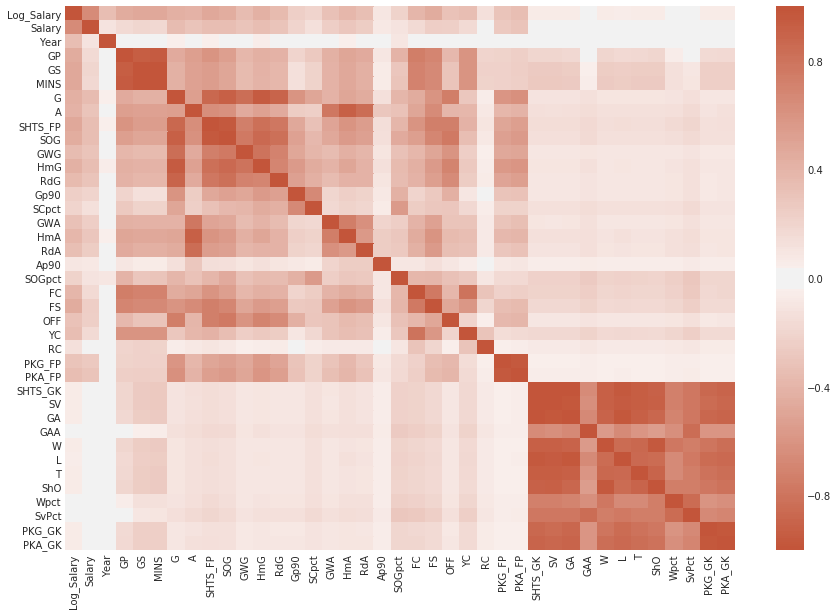

In [21]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr2, center=0, cmap=sns.diverging_palette(20, 20, n=200), vmin=-1, vmax=1)

In [100]:
# Setup the data
X2 = df2.drop(columns=['Salary', 'Log_Salary', 'Player', 'Club', 'POS'])
# X2 = df2[df2[cols[cols > 0.2].index]
# X2 = df2[['GP', 'GS', 'MINS']]
X2['Intercept'] = np.ones((len(X2), 1))
y2 = df2['Log_Salary']

In [101]:
df2['Log_Salary'].describe()

count    5235.000000
mean       11.447878
std         0.944072
min         9.464983
25%        10.819778
50%        11.289782
75%        11.957611
max        15.640060
Name: Log_Salary, dtype: float64

In [102]:
X2.head()

,Year,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK,Intercept
0,2007,29.0,28.0,2410.0,20.0,1.0,79.0,47.0,4.0,12.0,8.0,0.75,25.3,1.0,1.0,0.0,0.04,59.5,35.0,39.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2007,24.0,24.0,2125.0,19.0,5.0,97.0,53.0,5.0,13.0,6.0,0.80,19.6,2.0,3.0,2.0,0.21,54.6,31.0,20.0,42.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2007,26.0,25.0,2283.0,16.0,3.0,90.0,55.0,5.0,7.0,9.0,0.63,17.8,1.0,2.0,1.0,0.12,61.1,13.0,41.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2007,24.0,24.0,2149.0,15.0,6.0,75.0,43.0,6.0,8.0,7.0,0.63,20.0,2.0,3.0,3.0,0.25,57.3,21.0,57.0,50.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2007,28.0,24.0,2021.0,12.0,5.0,55.0,28.0,5.0,8.0,4.0,0.53,21.8,3.0,3.0,2.0,0.22,50.9,44.0,53.0,30.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
y2.head()

0    12.487485
1    14.220976
2    12.691605
3    13.527828
4    11.191342
Name: Log_Salary, dtype: float64

In [104]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=129)

#### Fit Model with Statsmodels

In [151]:
# Create your model
model = sm.OLS(y_train2, X_train2, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     79.41
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:14:26   Log-Likelihood:                -3930.4
No. Observations:                3664   AIC:                             7933.
Df Residuals:                    3628   BIC:                             8156.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.1009      0.004     25.348      0.000       0.093       0.109
GP            -0.0147      0.004     -3.543      0.000      -0.023      -0.007
GS             0.0466      0.014      3.344      0.001       0.019       0.074
MINS          -0.0002      0.000     -1.089      0.276      -0.001       0.000
G              0.0137      0.010      1.412      0.158      -0.005       0.033
A              0.0191      0.006      2.959      0.003       0.006       0.032
SHTS_FP        0.0154      0.003      5.837      0.000       0.010       0.021
SOG           -0.0317      0.007     -4.245      0.000      -0.046      -0.017
GWG            0.0175      0.022      0.793      0.428      -0.026       0.061
HmG            0.0273      0.010      2.617      0.009       0.007       0.048
RdG           -0.0135      0.011     -1.210      0.226      -0.035       0.008
Gp90           0.2300      0.084      2.742      0.006       0.066       0.394
SCpct         -0.0005      0.002     -0.266      0.790      -0.004       0.003
GWA            0.0139      0.022      0.621      0.534      -0.030       0.058
HmA            0.0142      0.010      1.450      0.147      -0.005       0.033
RdA            0.0049      0.011      0.436      0.663      -0.017       0.027
Ap90           0.0163      0.030      0.543      0.587      -0.043       0.075
SOGpct         0.0046      0.001      5.869      0.000       0.003       0.006
FC            -0.0055      0.002     -2.881      0.004      -0.009      -0.002
FS             0.0045      0.001      3.046      0.002       0.002       0.007
OFF            0.0063      0.003      1.986      0.047     8.2e-05       0.013
YC             0.0461      0.009      5.080      0.000       0.028       0.064
RC             0.0713      0.032      2.201      0.028       0.008       0.135
PKG_FP        -0.1931      0.081     -2.389      0.017      -0.352      -0.035
PKA_FP         0.2818      0.071      3.993      0.000       0.143       0.420
SHTS_GK       -0.0022      0.024     -0.094      0.925      -0.049       0.044
SV             0.0024      0.025      0.095      0.925      -0.047       0.052
GA             0.0054      0.027      0.199      0.842      -0.048       0.059
GAA           -0.0255      0.062     -0.412      0.681      -0.147       0.096
W             -0.0149      0.031     -0.485      0.628      -0.075       0.045
L             -0.0082      0.038     -0.217      0.828      -0.083       0.066
T             -0.0009      0.031     -0.028      0.977      -0.062       0.060
ShO            0.0530      0.037      1.447      0.148      -0.019       0.125
Wpct          -0.0016      0.003     -0.539      0.590      -0.007       0.004
SvPct          0.0023      0.002      0.956      0.339      -0.002       0.007
PKG_GK        -0.0065      0.073     -0.089      0.929      -0.149       0.136
PK

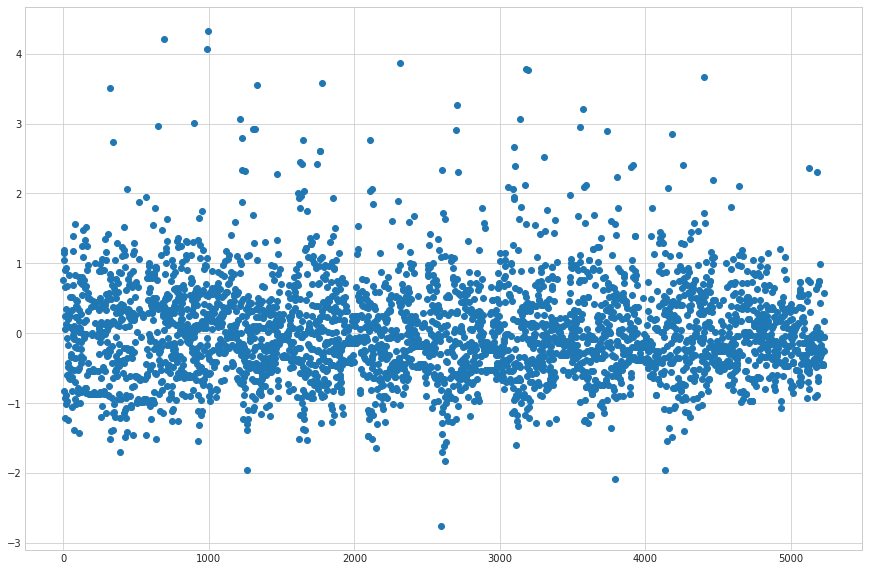

In [152]:
fit.resid.plot(style='o', figsize=(15,10));

#### Fit Model with sklearn

In [110]:
lr = LinearRegression(fit_intercept=False, normalize=False)
lr.fit(X_train2, y_train2)
lr.score(X_test2, y_test2)

0.43699995840284267

In [150]:
zipped=zip(X2.columns, lr.coef_)
features=sorted(zipped, key=lambda t: t[1],reverse=True)

In [136]:
from scipy import stats

In [143]:
omni, p = stats.normaltest(y_pred)
print(omni, p)

716.027752405 3.2851039812e-156


In [144]:
k, p = stats.kurtosistest(y2)
print(k, p)

17.5927631369 2.79890918925e-69


In [149]:
stats.kurtosis(, fisher=True) + 3

5.655503960143178

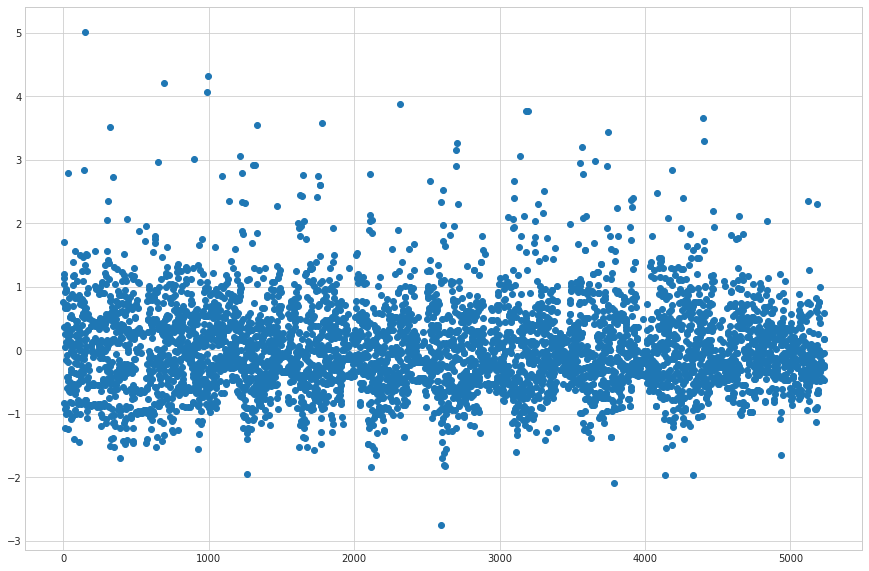

In [112]:
# Plot residuals
y_pred = lr.predict(X2)
y_error = y2 - y_pred

plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(y_error)), y_error)

In [114]:
est = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True, normalize=True))
est.fit(X_train2, y_train2)
est.score(X_test2, y_test2)

0.3846128881083713

#### Accessing Polynomial Feature Coefficients and Intercept

In [115]:
# Accessing polynomial feature intercept from pipeline
est.steps[1][1].intercept_

-6703.2947432600722

In [116]:
# Accessing polynomial feature coefficients from pipeline
est.steps[1][1].coef_

array([  4.01629679e-08,   3.27504286e+00,  -4.83455527e-01,
        -7.47188829e+00,   1.12443692e-01,   1.66143647e+00,
         3.71154164e+00,  -2.70135345e+00,   8.95840029e-01,
        -7.54353052e+00,  -3.85556920e+00,   1.50336723e+01,
         6.42401820e+01,  -2.19728820e+00,  -9.29754263e+00,
         8.43890444e+00,  -3.22418189e-01,   4.53118899e+01,
         5.52503883e-01,  -1.97509232e-01,  -3.39310336e-01,
         1.49583889e+00,   6.01279805e-01,   2.02287938e+01,
        -2.07689622e+01,  -4.00127583e+00,   1.54261083e+01,
        -1.58798341e+01,  -8.21927432e+00,  -8.26246775e+00,
        -4.08328677e+00,  -1.90935738e+01,  -1.29704606e+01,
         6.72651835e+00,  -4.78417916e-01,   9.85957758e-01,
         3.29997946e+00,  -2.99325137e+01,  -3.03981982e-08,
        -1.59697873e-03,   4.74025047e-04,   7.47712185e-03,
        -1.12018434e-04,  -2.25840893e-03,  -3.64589049e-03,
         2.70666561e-03,  -4.22693632e-04,   7.47887996e-03,
         2.77412746e-03,

#### Regularization

In [119]:
r_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), 
                      RidgeCV(fit_intercept=True, normalize=True))
r_est.fit(X_train2, y_train2)
r_est.score(X_test2, y_test2)

0.48602019611367875

In [135]:
r_est.steps[1][1].alpha_

0.10000000000000001

In [121]:
l_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), 
                      LassoCV(fit_intercept=True, normalize=True))
l_est.fit(X_train2, y_train2)
l_est.score(X_test2, y_test2)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.48313117689911489

In [132]:
l_est.steps[1][1].alpha_

6.8571115979501127e-05

##### ElasticNetCV

In [133]:
e_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), 
                      ElasticNetCV(l1_ratio=1, fit_intercept=True, normalize=True))
e_est.fit(X_train2, y_train2)
# R^2
e_est.score(X_test2, y_test2)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.48313117689911489

In [134]:
e_est.steps[1][1].alpha_

6.8571115979501127e-05

In [123]:
# Adjusted R^2
1 - (1-e_est.score(X_test2, y_test2))*(len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1)

0.468764903186213

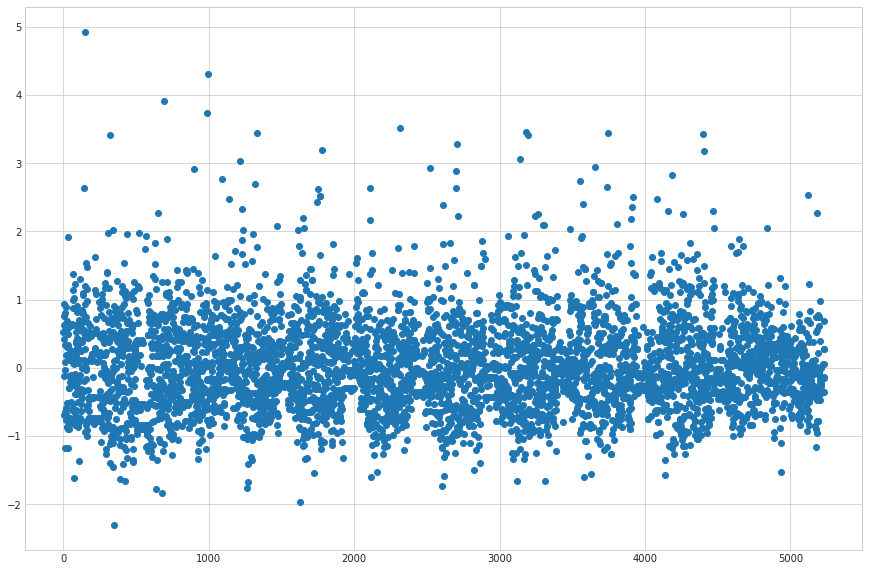

In [124]:
# Plot Transformed Residuals
yhat = e_est.predict(X2)
residuals = y2 - yhat

plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(residuals)), residuals)

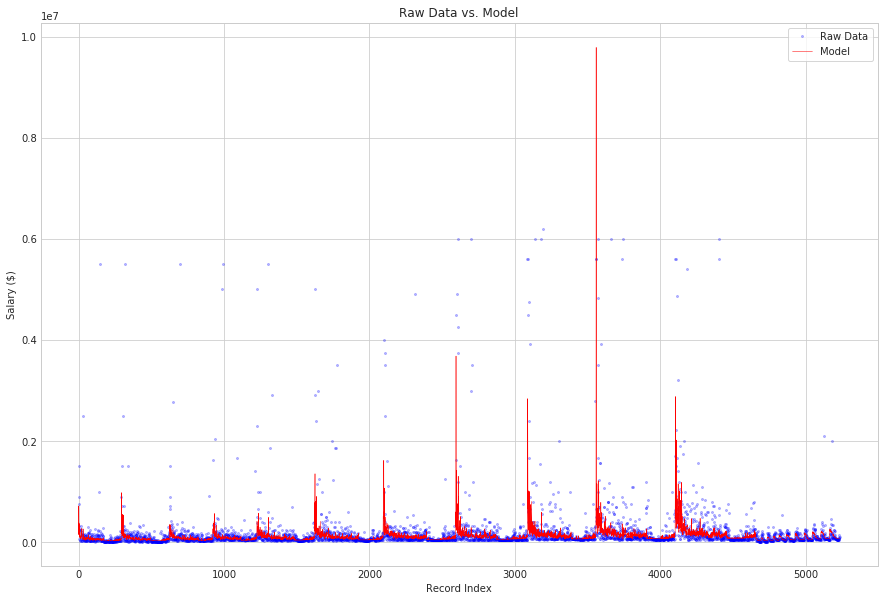

In [73]:
# Plot Transformed Fit vs. Actual Data
yhat = np.exp(e_est.predict(X2))
y_orig = df['Salary']
residuals = yhat - y_orig

fig = plt.figure(num=None, figsize=(15, 10))
plt.plot(np.arange(len(y_orig)), y_orig, 'bo', label='Raw Data',
         ls='None', ms=2, alpha=0.25) 
plt.plot(np.arange(len(yhat)), yhat, 'r-', label='Model',
         alpha=1, linewidth=0.5)
plt.ylabel('Salary ($)')
plt.xlabel('Record Index')
plt.title('Raw Data vs. Model')
plt.legend(frameon=True)
plt.savefig('raw_vs_model.svg')

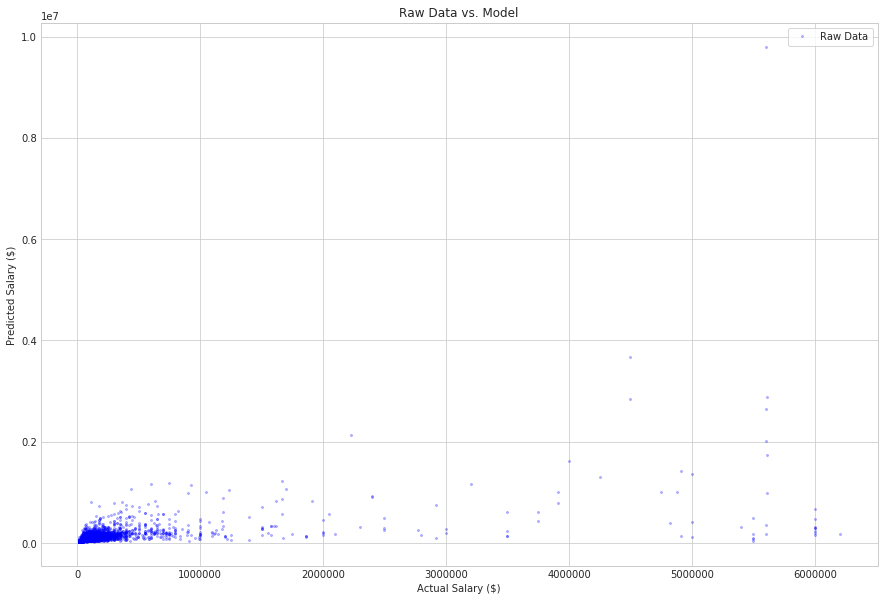

In [74]:
# Plot Transformed Fit vs. Actual Data
yhat = np.exp(e_est.predict(X2))
y_orig = df['Salary']
residuals = yhat - y_orig

fig = plt.figure(num=None, figsize=(15, 10))
plt.plot(y_orig, yhat, 'bo', label='Raw Data',
         ls='None', ms=2, alpha=0.25) 
plt.ylabel('Predicted Salary ($)')
plt.xlabel('Actual Salary ($)')
plt.title('Raw Data vs. Model')
plt.legend(frameon=True)
plt.savefig('raw_vs_model.svg')

In [76]:
df.columns

Index(['Salary', 'Player', 'Club', 'POS', 'Year', 'GP', 'GS', 'MINS', 'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 'HmG', 'RdG', 'Gp90', 'SCpct', 'GWA', 'HmA', 'RdA', 'Ap90', 'SOGpct', 'FC', 'FS', 'OFF', 'YC', 'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV', 'GA', 'GAA', 'W', 'L', 'T', 'ShO', 'Wpct', 'SvPct', 'PKG_GK', 'PKA_GK'], dtype='object')

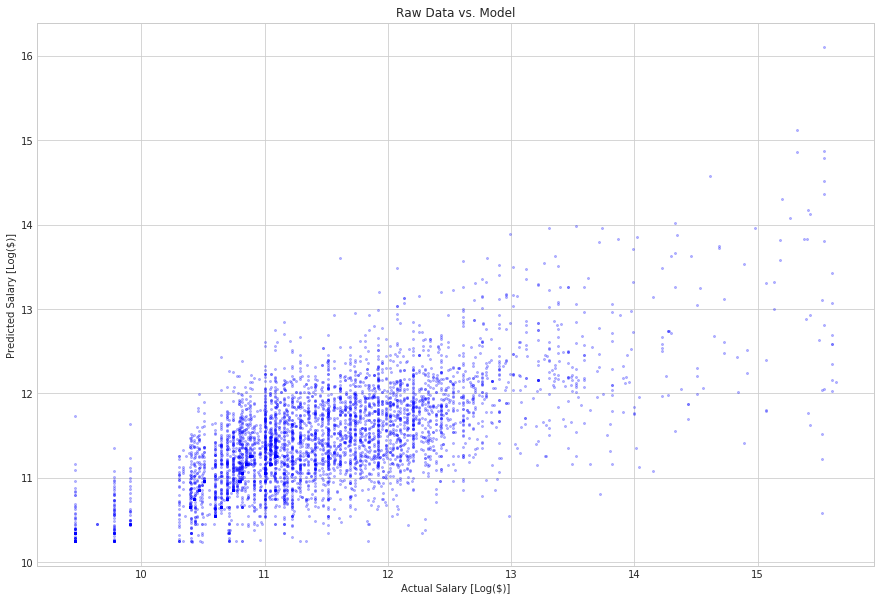

In [86]:
# Plot Transformed Fit vs. Actual Data
yhat = pd.Series(e_est.predict(X2), name='Predicted')
y_orig = df2['Log_Salary']
residuals = yhat - y_orig

fig = plt.figure(num=None, figsize=(15, 10))
plt.plot(y_orig, yhat, 'bo', label='Raw Data',
         ls='None', ms=2, alpha=0.25) 
plt.ylabel('Predicted Salary [Log($)]')
plt.xlabel('Actual Salary [Log($)]')
plt.title('Raw Data vs. Model')
plt.savefig('raw_vs_model.svg')

Text(0.5,1,'Actual vs. Predicted Salary')

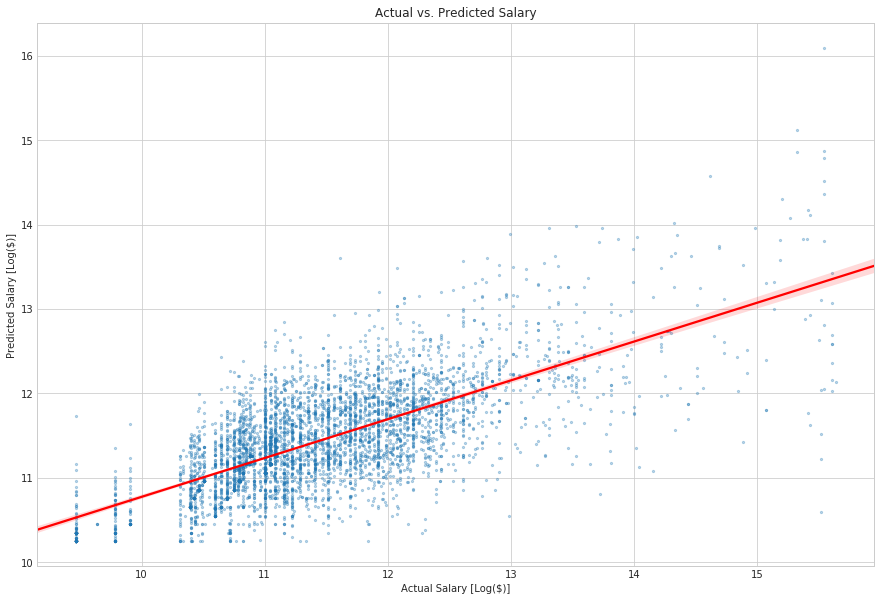

In [99]:
plt.figure(num=None, figsize=(15, 10))
ax = sns.regplot(y_orig, yhat, 
                 line_kws={'color':'red'}, 
                 scatter_kws={'alpha':0.3, 's':5});
ax.set_ylabel('Predicted Salary [Log($)]')
ax.set_xlabel('Actual Salary [Log($)]')
ax.set_title('Actual vs. Predicted Salary')

In [188]:
features

[('PKA_FP', 0.28177266417475161),
 ('Gp90', 0.22997463668776513),
 ('Year', 0.10087158993213867),
 ('RC', 0.071269110856069448),
 ('ShO', 0.053012205944551367),
 ('PKA_GK', 0.048442743012675649),
 ('GS', 0.04662535065522927),
 ('YC', 0.046076373892963367),
 ('HmG', 0.030970297916841021),
 ('HmA', 0.021348899999078026),
 ('GWG', 0.017543225989868471),
 ('Ap90', 0.016339063052198486),
 ('SHTS_FP', 0.015433150788968546),
 ('GWA', 0.013873328757634177),
 ('A', 0.011982001493890865),
 ('RdA', 0.011969744233344095),
 ('G', 0.010008552856218501),
 ('OFF', 0.006323605092079348),
 ('GA', 0.0054012437066564495),
 ('SOGpct', 0.0045755597397759262),
 ('FS', 0.0045130876638767217),
 ('SV', 0.0024078666069972002),
 ('SvPct', 0.0022871944028760903),
 ('Intercept', 0.0),
 ('MINS', -0.00019497066432696815),
 ('SCpct', -0.00050893895463273117),
 ('T', -0.00087959419235269121),
 ('Wpct', -0.0015894984230954525),
 ('SHTS_GK', -0.00223110061991813),
 ('FC', -0.0054828950265865227),
 ('PKG_GK', -0.006500210

In [208]:
tfeats = []
feat_names = []
for f in features:
    feat_names.append(f[0])
    tfeats.append(100 * (np.exp(f[1]) - 1))

In [209]:
tfeats

[32.547735724395885,
 25.856808806927091,
 10.613459382516922,
 7.3870177109325086,
 5.4442515507685085,
 4.9635271146334592,
 4.7729404404848408,
 4.71543831597796,
 3.1454867073299919,
 2.1578418174930558,
 1.7698012203962943,
 1.6473275515180852,
 1.5552856881857036,
 1.3970009962384733,
 1.2054073240731267,
 1.2041668306293607,
 1.0058805934963999,
 0.63436412941710874,
 0.54158567210835784,
 0.45860435969815594,
 0.45232869817071197,
 0.24107678459273085,
 0.22898120272858424,
 0.0,
 -0.019495165878213871,
 -0.050880946717091202,
 -0.087920746277780903,
 -0.15882358395237217,
 -0.22286135648972305,
 -0.54678913912936666,
 -0.64791297417042815,
 -0.81971562797955588,
 -0.97548588861164909,
 -1.45680169037119,
 -1.4809324338645236,
 -2.5138407749335845,
 -3.1200577266990326,
 -17.557785870047937]

In [210]:
feat_names

['PKA_FP',
 'Gp90',
 'Year',
 'RC',
 'ShO',
 'PKA_GK',
 'GS',
 'YC',
 'HmG',
 'HmA',
 'GWG',
 'Ap90',
 'SHTS_FP',
 'GWA',
 'A',
 'RdA',
 'G',
 'OFF',
 'GA',
 'SOGpct',
 'FS',
 'SV',
 'SvPct',
 'Intercept',
 'MINS',
 'SCpct',
 'T',
 'Wpct',
 'SHTS_GK',
 'FC',
 'PKG_GK',
 'L',
 'RdG',
 'GP',
 'W',
 'GAA',
 'SOG',
 'PKG_FP']

In [ ]:
from scipy import stats

In [ ]:
lamb = stats.boxcox_normmax(df['Salary'])

In [ ]:
y_t = (np.power(df['Salary'], -lamb) - 1) / -lamb

In [ ]:
plt.hist(y_t);

In [ ]:
plt.hist(df['Salary']);

In [ ]:
sns.color_palette("Blues")